In [1]:
# Import Dependencies
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
# Set File path for original Data Set
shark_attack_csv = 'data_files/clean_data.csv'

In [3]:
# Read CSV into a Data Frame
shark_df = pd.read_csv(shark_attack_csv, encoding='iso-8859-1')

In [4]:
shark_df.shape

(6302, 24)

In [5]:
#View Sample
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


# Activity 

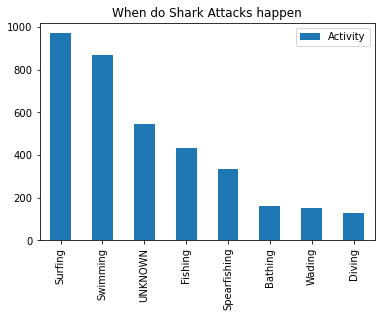

In [13]:
shark_activity=shark_df["Activity"].value_counts().to_frame()
activity_df=shark_activity[shark_activity['Activity']>100]
activity_df.plot(kind="bar",title="When do Shark Attacks happen")
plt.show()

# Species 


In [15]:
shark_df['Species'].value_counts()

Non-Disclosed                                                               2838
White shark                                                                  163
Shark involvement prior to death was not confirmed                           105
Invalid                                                                      102
Shark involvement not confirmed                                               88
                                                                            ... 
White shark, 3.5 m [11.5'], species identity confirmed by tooth fragment       1
Bull shark, 6' to 7'                                                           1
3.7 m [12'] sharks                                                             1
 Bull shark, 1.2m                                                              1
White shark, 16', 2,312-lb                                                     1
Name: Species, Length: 1550, dtype: int64

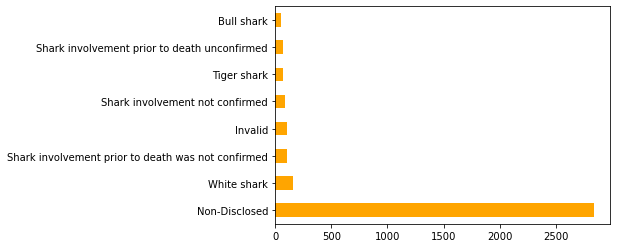

In [16]:
species_df = shark_df['Species'].value_counts()
species_df[species_df>50].plot.barh(color='orange')
plt.show()

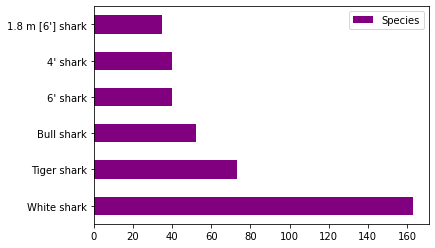

In [17]:
species_df = shark_df['Species'].value_counts().to_frame()
species_df=species_df.drop(['Non-Disclosed', 'Shark involvement prior to death was not confirmed','Invalid',
                            'Shark involvement not confirmed','Shark involvement prior to death unconfirmed',
                            'Questionable incident'])
species_df[species_df['Species']>34].plot.barh(color='purple')
plt.show()

# Date 

In [18]:
shark_df['Species'].value_counts() 

Non-Disclosed                                                               2838
White shark                                                                  163
Shark involvement prior to death was not confirmed                           105
Invalid                                                                      102
Shark involvement not confirmed                                               88
                                                                            ... 
White shark, 3.5 m [11.5'], species identity confirmed by tooth fragment       1
Bull shark, 6' to 7'                                                           1
3.7 m [12'] sharks                                                             1
 Bull shark, 1.2m                                                              1
White shark, 16', 2,312-lb                                                     1
Name: Species, Length: 1550, dtype: int64

## Year

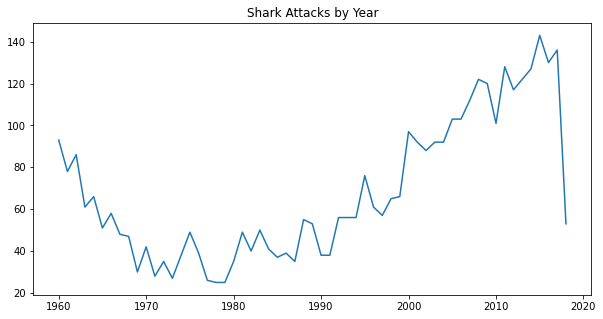

In [24]:
plt.figure(figsize=(10,5))
Years_values = shark_df['Year'].value_counts().sort_index()
Years_values.plot(title="Shark Attacks by Year")
plt.show()

## Month

In [26]:
Month_df=shark_df['Month'][:len(shark_df)-2].value_counts().to_frame()
month_shark_df=Month_df.iloc[:len(Month_df)-1,].transpose()
month_shark_df = month_shark_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
month_shark_df=month_shark_df.transpose()

<Figure size 720x360 with 0 Axes>

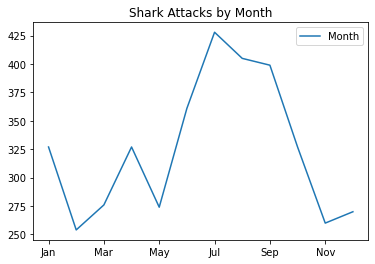

In [27]:
plt.figure(figsize=(10,5))
month_shark_df.plot(title="Shark Attacks by Month")
plt.show()

## Day

In [28]:
shark_df.Day.unique()

array(['25', '18', '9', '8', '4', '3', '27', '26', '24', '21', '13', '12',
       '30', '28', '23', '22', '19', '15', '14', '10', '5', '31', '11',
       '1', '20', '16', '17', '06', '2', '29', '07', '7', '05', '6', '09',
       '08', '03', nan, '02', '01', '04'], dtype=object)

In [30]:
shark_df_day=shark_df.Day.value_counts()
new_day_df=shark_df_day.reset_index()
new_day_df['index']=new_day_df['index'].astype(int)
new_day_df=new_day_df.sort_values(by="index").reset_index(drop=True).set_index("index")

<Figure size 720x360 with 0 Axes>

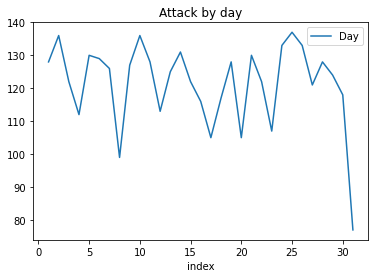

In [31]:
plt.figure(figsize=(10,5))
new_day_df.plot(kind="line",title="Attack by day")
plt.show()

# Type

In [32]:
shark_df.Type.value_counts()

Unprovoked      3037
Provoked         367
Invalid          343
Boat             111
Boating           92
Sea Disaster      78
Questionable       2
Boatomg            1
Name: Type, dtype: int64

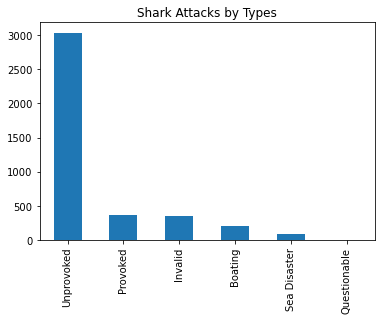

In [34]:
type_value=shark_df.Type.value_counts()
type_value.plot(kind="bar",title="Shark Attacks by Types")
plt.show()

# Time 

In [39]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Day,Month
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,25,Jun
1,18-Jun-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,Non-Disclosed,18,Jun
2,9-Jun-18,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Non-Disclosed,9,Jun
3,8-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,8,Jun
4,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",4,Jun


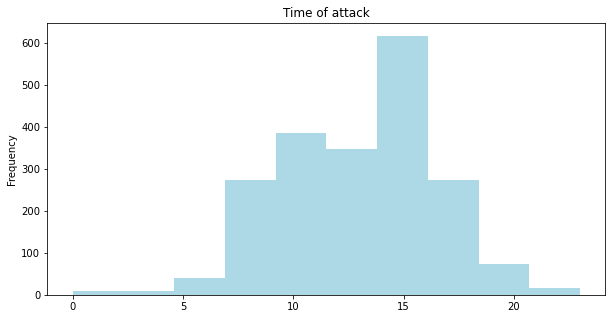

In [41]:
plt.figure(figsize=(10,5))
shark_df_time = shark_df[shark_df['Time']<25]['Time']
shark_df_time.plot(kind='hist', color='lightblue', title= "Time of attack")
plt.show()

# Age

In [45]:
shark_df.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',

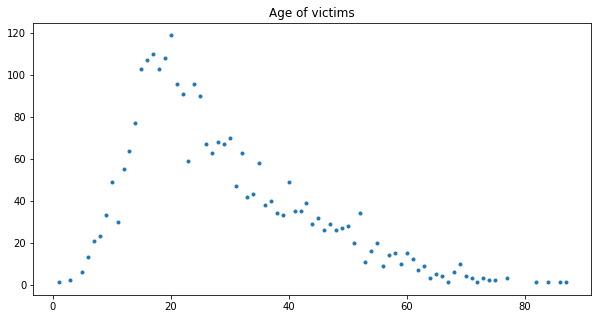

In [46]:
plt.figure(figsize=(10,5))
age_values = shark_df['Age'].value_counts().sort_index()
age_values.plot(style=".",title = "Age of victims")
plt.show()

# Sex

In [47]:
shark_df.Sex.unique()

array(['F', 'M', 'Non-Disclosed', 'M ', 'lli'], dtype=object)

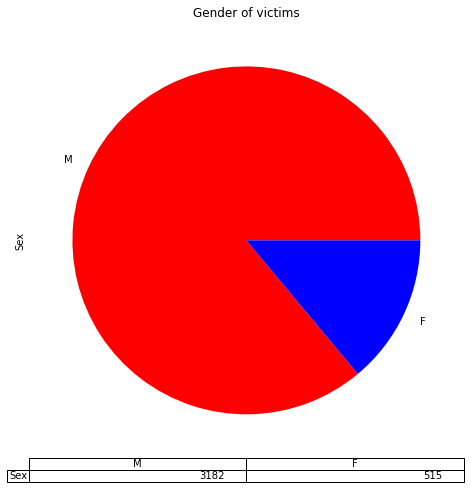

In [49]:
plt.figure(figsize=(10,8))
sex_value=shark_df[shark_df['Sex'].isin(['M','F'])]["Sex"].value_counts()
sex_value.plot(kind='pie',title= "Gender of victims",colors= ['red','blue'], table =True)
plt.show()

# Fatal

In [50]:
shark_df['Fatal (Y/N)'].unique()

array(['N', 'Y', 'Uncomfirmed'], dtype=object)

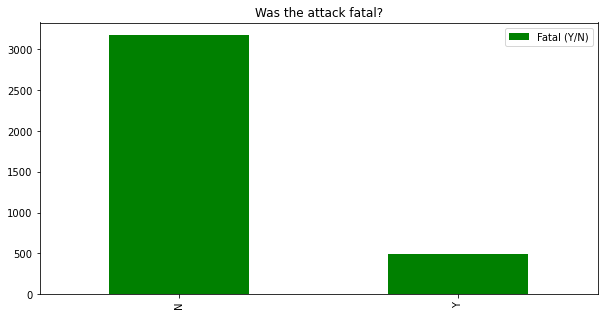

In [51]:
plt.figure(figsize=(10,5))
Fatal_value=shark_df[shark_df['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()
Fatal_value.plot(kind='bar', title= "Was the attack fatal?", legend = True, color= 'green')
plt.show()

## Fatal vs Species

In [52]:
grouped_species_df=shark_df[shark_df["Fatal (Y/N)"]=="Y"].groupby("Species").count()
Fatal_Species=grouped_species_df[(grouped_species_df['Fatal (Y/N)']>=5) & (grouped_species_df['Fatal (Y/N)']<40)]['Fatal (Y/N)'].sort_values()
Fatal_Species

Species
3.7 m [12'] shark                      5
6 m [20'] white shark                  5
Thought to involve a Zambesi shark     5
Bull shark                            10
Tiger shark                           16
White shark                           29
Name: Fatal (Y/N), dtype: int64

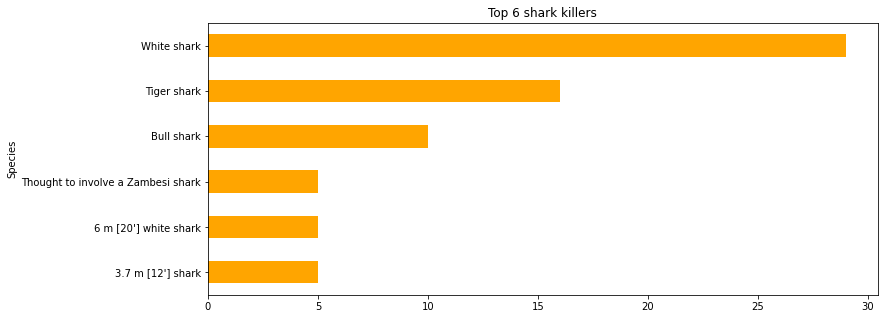

In [53]:
plt.figure(figsize=(12,5))
Fatal_Species.plot.barh(color='orange',title="Top 6 shark killers")
plt.show()

## Fatal vs Activity

In [54]:
grouped_activity_df=shark_df[shark_df["Fatal (Y/N)"]=="Y"].groupby("Activity").count()
Fatal_activity=grouped_activity_df[grouped_activity_df['Fatal (Y/N)']>=10]['Fatal (Y/N)'].sort_values()
Fatal_activity

Activity
Diving           11
Snorkeling       11
Fishing          12
Scuba diving     12
Body boarding    14
Spearfishing     32
UNKNOWN          35
Surfing          46
Swimming         99
Name: Fatal (Y/N), dtype: int64

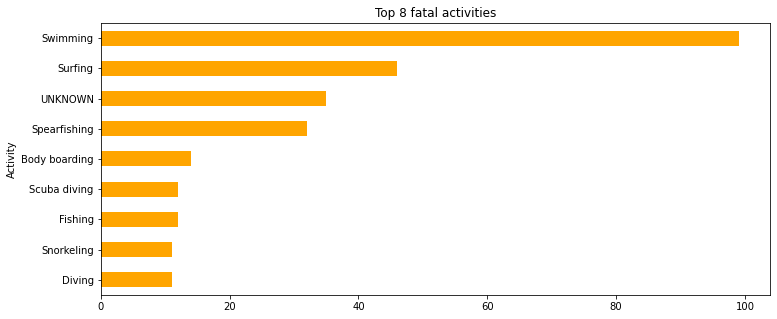

In [55]:
plt.figure(figsize=(12,5))
Fatal_activity.plot.barh(color='orange',title="Top 8 fatal activities")
plt.show()

# Injury

In [56]:
shark_df['Injury'].value_counts()[:10]

FATAL                      279
Foot bitten                 68
Survived                    65
No injury                   55
Left foot bitten            48
Leg bitten                  47
Right foot bitten           39
No injury, board bitten     31
No details                  26
Hand bitten                 21
Name: Injury, dtype: int64

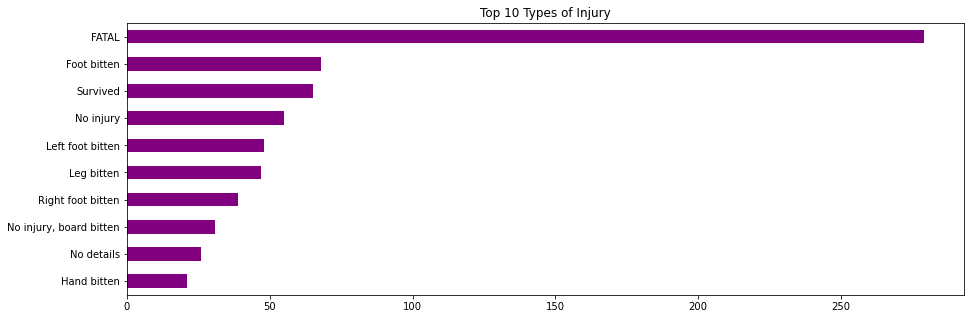

In [57]:
plt.figure(figsize=(15,5))
Injury_value=shark_df['Injury'].value_counts()[:10].sort_values()
Injury_value.plot.barh(color='purple',title="Top 10 Types of Injury")
plt.show()

In [58]:
wordcloud = WordCloud(background_color='white',stopwords=stopwords,
                      max_words=200,max_font_size=40, scale=5,
                      random_state=1).generate(str(shark_df['Injury']))

fig = plt.figure(1, figsize=(15,15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()